In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

file_path = '../Data_clean/Testing_data/Locus/'
sensors = ['2.T01', '2.T02', '2.T03', '2.T04' ]
alta_path = '../Data_clean/Testing_data/Alta/2.P02_processed.xlsx'

Average count for Alta sensor between 11:00 and 12:30: 274.77777777777777


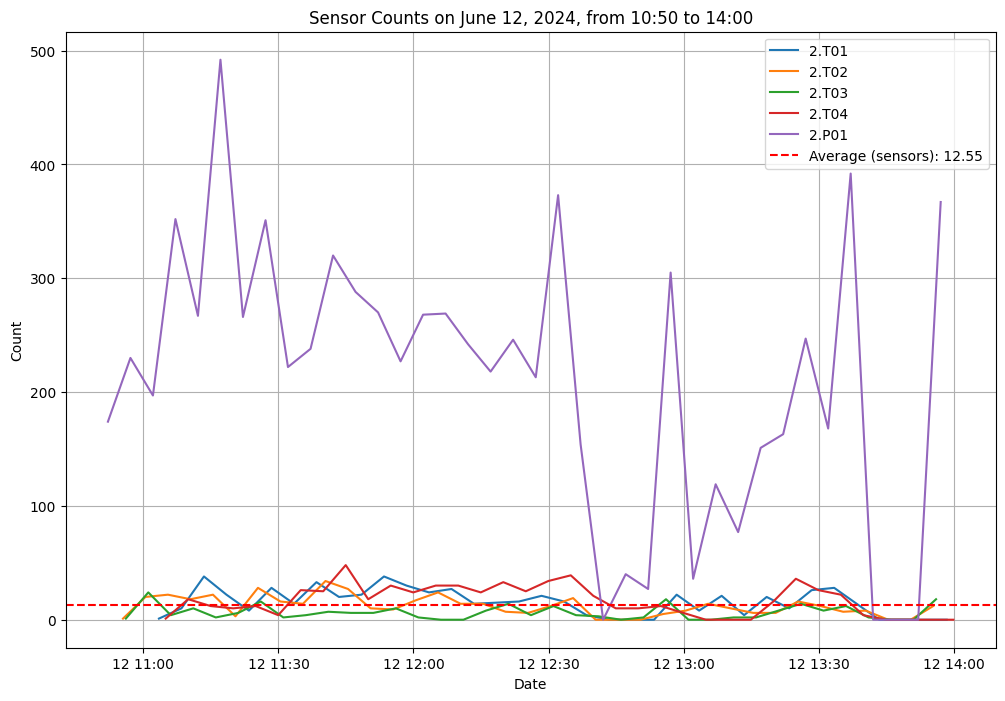

In [25]:

import os

dfs = []


for sensor in sensors:
    file_name = os.path.join(file_path, f'{sensor}_processed.xlsx')
    df = pd.read_excel(file_name, parse_dates=['Date'])
    df['Sensor'] = sensor
    dfs.append(df)


alta_df = pd.read_excel(alta_path, parse_dates=['Date'])
alta_df['Sensor'] = '2.P01'
dfs.append(alta_df)
concatenated_df = pd.concat(dfs, ignore_index=True)

concatenated_df['Count'] = pd.to_numeric(concatenated_df['Count'], errors='coerce')

start_time = '2024-06-12 10:50:00'
end_time = '2024-06-12 14:00:00'
mask = (concatenated_df['Date'] >= start_time) & (concatenated_df['Date'] <= end_time)
filtered_df = concatenated_df[mask]

overall_avg = filtered_df[filtered_df['Sensor'].isin(sensors)]['Count'].mean()

alta_start_time = '2024-06-12 11:00:00'
alta_end_time = '2024-06-12 12:30:00'
alta_mask = (alta_df['Date'] >= alta_start_time) & (alta_df['Date'] <= alta_end_time)
alta_avg = alta_df[alta_mask]['Count'].mean()

print(f'Average count for Alta sensor between 11:00 and 12:30: {alta_avg}')

plt.figure(figsize=(12, 8))

for sensor in sensors:
    sensor_data = filtered_df[filtered_df['Sensor'] == sensor]
    plt.plot(sensor_data['Date'], sensor_data['Count'], label=sensor)

alta_sensor_data = filtered_df[filtered_df['Sensor'] == '2.P01']
plt.plot(alta_sensor_data['Date'], alta_sensor_data['Count'], label='2.P01')

plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Average (sensors): {overall_avg:.2f}')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sensor Counts on June 12, 2024, from 10:50 to 14:00')
plt.legend()
plt.grid(True)
plt.show()


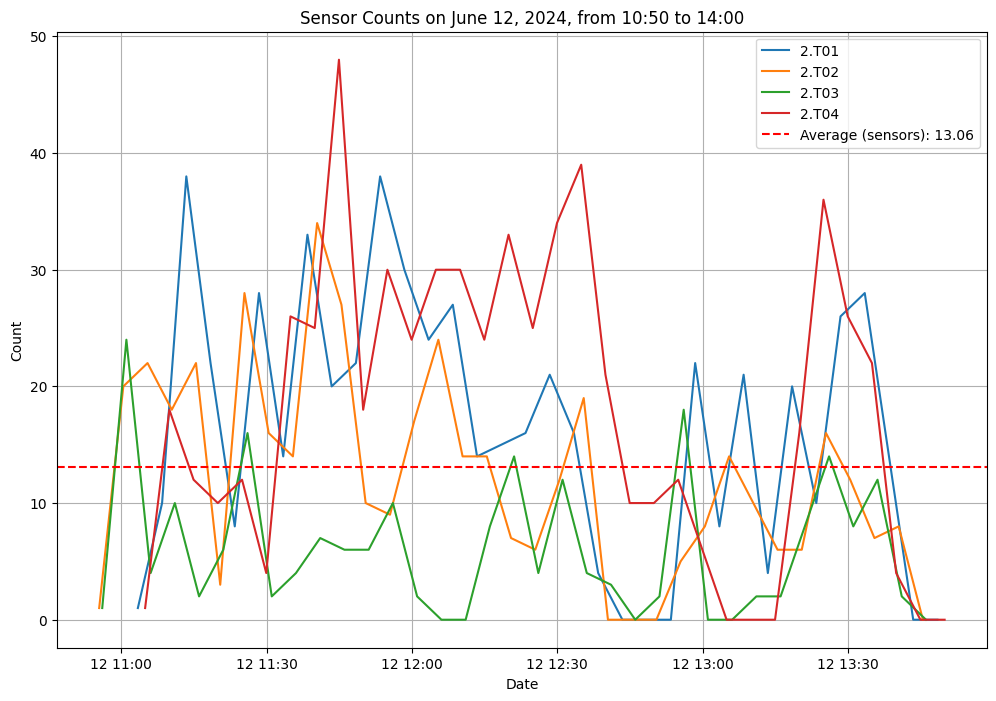

In [36]:
dfs = []


for sensor in sensors:
    file_name = os.path.join(file_path, f'{sensor}_processed.xlsx')
    df = pd.read_excel(file_name, parse_dates=['Date'])
    df['Sensor'] = sensor
    dfs.append(df)


concatenated_df = pd.concat(dfs, ignore_index=True)

concatenated_df['Count'] = pd.to_numeric(concatenated_df['Count'], errors='coerce')

start_time = '2024-06-12 10:50:00'
end_time = '2024-06-12 13:50:00'
mask = (concatenated_df['Date'] >= start_time) & (concatenated_df['Date'] <= end_time)
filtered_df = concatenated_df[mask]

overall_avg = filtered_df[filtered_df['Sensor'].isin(sensors)]['Count'].mean()



plt.figure(figsize=(12, 8))

for sensor in sensors:
    sensor_data = filtered_df[filtered_df['Sensor'] == sensor]
    plt.plot(sensor_data['Date'], sensor_data['Count'], label=sensor)




plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Average (sensors): {overall_avg:.2f}')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sensor Counts on June 12, 2024, from 10:50 to 14:00')
plt.legend()
plt.grid(True)
plt.show()
